# Data Preparation and EDA

In this notebook, data preparation and EDA analysis will be prepared for the Capstone Project of Predicting Euroleague Game Outcomes Based on Player and Team Statistics. 

## Data Preparation

This section will consist of three sections, those are:
1) Characterization of the data set
2) Data Cleaning

## EDA

## Findings 

In this section, main findings will be highlighted.

## Data Preparation

### Characterization of the data set

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [28]:
import pandas as pd
import seaborn as sns

In [18]:
players_df = pd.read_csv("Euroleague/output/player_stats_2023.csv")

In [20]:
teams_df = pd.read_csv("Euroleague/output/team_stats_2023.csv")

In [22]:
games_df = pd.read_csv("Euroleague/output/euroleague_metadata_2023_2024.csv")

#### Players Data Frame

In [26]:
players_df.head(10)

,playerRanking,gamesPlayed,gamesStarted,minutesPlayed,pointsScored,twoPointersMade,twoPointersAttempted,twoPointersPercentage,threePointersMade,threePointersAttempted,...,foulsDrawn,pir,player.code,player.name,player.age,player.imageUrl,player.team.code,player.team.tvCodes,player.team.name,player.team.imageUrl
0,1,25.0,8.0,6.611333,0.9,0.3,0.5,53.8%,0.1,0.6,...,0.1,-0.2,008850,"RAIESTE, SANDER",24,https://media-cdn.incrowdsports.com/32b9b901-2...,BAS,BKN,Baskonia Vitoria-Gasteiz,https://media-cdn.incrowdsports.com/e324a6af-2...
1,2,22.0,2.0,6.951515,0.8,0.1,0.4,37.5%,0.2,1.0,...,0.1,0.0,001518,"RICCI, GIAMPAOLO",32,https://media-cdn.incrowdsports.com/dc523b20-4...,MIL,EA7,EA7 Emporio Armani Milan,https://media-cdn.incrowdsports.com/8154f184-c...
2,3,19.0,2.0,6.949123,1.2,0.4,0.6,58.3%,0.1,0.3,...,0.3,0.5,004720,"LAZAREVIC, STEFAN",27,https://media-cdn.incrowdsports.com/ae23bbbe-9...,RED,CZV,Crvena Zvezda Meridianbet Belgrade,https://media-cdn.incrowdsports.com/d2eef4a8-6...
3,4,26.0,2.0,10.054487,2.2,0.7,1.8,40.4%,0.1,0.7,...,0.9,1.0,011386,"YAACOV, NOAM",19,https://media-cdn.incrowdsports.com/39341c78-b...,ASV,ASV,LDLC ASVEL Villeurbanne,https://media-cdn.incrowdsports.com/e33c6d1a-9...
4,5,22.0,16.0,13.781818,2.7,0.4,1.0,38.1%,0.5,1.7,...,0.9,1.0,LUO,"LAZIC, BRANKO",34,https://media-cdn.incrowdsports.com/6dcc04d5-8...,RED,CZV,Crvena Zvezda Meridianbet Belgrade,https://media-cdn.incrowdsports.com/d2eef4a8-6...
5,6,23.0,0.0,6.031884,2.1,0.7,1.1,68%,0.2,0.7,...,0.3,1.5,011209,"KALAITZAKIS, PANAGIOTIS",24,https://media-cdn.incrowdsports.com/59c8e70a-6...,PAN,PAO,Panathinaikos AKTOR Athens,https://media-cdn.incrowdsports.com/e3dff28a-9...
6,7,30.0,16.0,15.709444,4.1,0.5,1.4,36.6%,0.8,2.9,...,0.8,1.6,012740,"ROBERTSON, KASSIUS",29,https://media-cdn.incrowdsports.com/5aa7f467-8...,PAM,VBC,Valencia Basket,https://media-cdn.incrowdsports.com/efd12730-f...
7,8,19.0,2.0,6.335965,1.4,0.3,0.4,62.5%,0.2,0.7,...,0.4,1.6,006860,"LAVRINOVICIUS, DANIELIUS",24,https://media-cdn.incrowdsports.com/2ec3ac45-6...,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
8,9,20.0,0.0,8.263333,2.6,0.4,1.0,42.9%,0.6,1.3,...,0.2,1.6,004233,"MENCO, RAFI",29,https://media-cdn.incrowdsports.com/242f0b43-a...,TEL,MTA,Maccabi Playtika Tel Aviv,https://media-cdn.incrowdsports.com/5c55ef14-2...
9,10,30.0,25.0,9.945556,2.5,0.6,1.2,50%,0.4,1.2,...,0.5,1.8,005145,"COHEN, JAKE",33,https://media-cdn.incrowdsports.com/e8d3f0dc-c...,TEL,MTA,Maccabi Playtika Tel Aviv,https://media-cdn.incrowdsports.com/5c55ef14-2...


In [30]:
players_df.tail(10)

,playerRanking,gamesPlayed,gamesStarted,minutesPlayed,pointsScored,twoPointersMade,twoPointersAttempted,twoPointersPercentage,threePointersMade,threePointersAttempted,...,foulsDrawn,pir,player.code,player.name,player.age,player.imageUrl,player.team.code,player.team.tvCodes,player.team.name,player.team.imageUrl
204,205,33.0,33.0,23.288889,11.1,4.2,6.3,66.5%,0.0,0.0,...,2.6,16.7,011199,"NEBO, JOSH",26,https://media-cdn.incrowdsports.com/96ccc0f9-f...,TEL,MTA,Maccabi Playtika Tel Aviv,https://media-cdn.incrowdsports.com/5c55ef14-2...
205,206,29.0,28.0,30.440230,15.7,2.9,5.0,59%,2.6,6.6,...,3.6,16.8,007831,"SHIELDS, SHAVON",29,https://media-cdn.incrowdsports.com/cc164c6b-d...,MIL,EA7,EA7 Emporio Armani Milan,https://media-cdn.incrowdsports.com/8154f184-c...
206,207,31.0,29.0,27.741935,14.5,4.4,7.4,59%,0.8,3.0,...,5.2,17.6,001133,"SHENGELIA, TORNIKE",32,https://media-cdn.incrowdsports.com/892c9315-5...,VIR,VIR,Virtus Segafredo Bologna,https://media-cdn.incrowdsports.com/4af5e83b-f...
207,208,34.0,34.0,27.387255,17.3,3.1,5.9,52.5%,2.4,5.6,...,4.7,18.3,011218,"EVANS, KEENAN",27,https://media-cdn.incrowdsports.com/b6443b59-d...,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
208,209,21.0,17.0,26.521429,16.9,3.2,5.0,63.8%,2.2,5.2,...,4.0,18.9,000796,"MIROTIC, NIKOLA",32,https://media-cdn.incrowdsports.com/a771b68b-2...,MIL,EA7,EA7 Emporio Armani Milan,https://media-cdn.incrowdsports.com/8154f184-c...
209,210,33.0,6.0,25.224747,14.0,3.8,6.2,60.8%,0.9,2.5,...,4.5,18.9,012201,"MONEKE, CHIMA",28,https://media-cdn.incrowdsports.com/c99df4e9-3...,BAS,BKN,Baskonia Vitoria-Gasteiz,https://media-cdn.incrowdsports.com/e324a6af-2...
210,211,34.0,22.0,28.836765,13.6,4.9,7.9,62.3%,0.0,0.0,...,6.2,19.1,003842,"LESSORT, MATHIAS",28,https://media-cdn.incrowdsports.com/b283a9ed-2...,PAN,PAO,Panathinaikos AKTOR Athens,https://media-cdn.incrowdsports.com/e3dff28a-9...
211,212,27.0,27.0,28.241358,17.7,4.3,9.0,47.3%,1.4,3.7,...,5.7,19.5,009863,"BALDWIN IV, WADE",27,https://media-cdn.incrowdsports.com/2e29a079-e...,TEL,MTA,Maccabi Playtika Tel Aviv,https://media-cdn.incrowdsports.com/5c55ef14-2...
212,213,34.0,34.0,31.277451,18.7,3.9,8.1,48.4%,2.3,6.1,...,4.5,20.1,005985,"JAMES, MIKE",33,https://media-cdn.incrowdsports.com/6798f111-3...,MCO,ASM,AS Monaco,https://media-cdn.incrowdsports.com/89ed276a-2...
213,214,34.0,32.0,31.687745,16.8,2.7,4.9,55.4%,2.6,6.5,...,4.2,20.1,007200,"LARKIN, SHANE",31,https://media-cdn.incrowdsports.com/29f7e3f7-2...,IST,EFS,Anadolu Efes Istanbul,https://media-cdn.incrowdsports.com/8ea8cec7-d...


In [32]:
players_df.shape

(214, 33)

In [34]:
players_df.describe()

,playerRanking,gamesPlayed,gamesStarted,minutesPlayed,pointsScored,twoPointersMade,twoPointersAttempted,threePointersMade,threePointersAttempted,freeThrowsMade,...,totalRebounds,assists,steals,turnovers,blocks,blocksAgainst,foulsCommited,foulsDrawn,pir,player.age
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,...,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.471963,28.271028,13.714953,18.842801,7.625701,1.888785,3.453738,0.866355,2.358411,1.255140,...,2.865421,1.623832,0.607477,1.083178,0.223832,0.219159,1.837383,1.821495,8.219626,28.766355
std,61.906993,4.614877,10.629398,6.042061,3.915426,1.112231,1.916266,0.686208,1.719291,0.955364,...,1.449274,1.401455,0.328662,0.628582,0.275685,0.164323,0.511744,1.137003,4.612433,3.845806
min,1.000000,18.000000,0.000000,5.698148,0.800000,0.100000,0.200000,0.000000,0.000000,0.000000,...,0.600000,0.100000,0.000000,0.000000,0.000000,0.000000,0.600000,0.100000,-0.200000,19.000000
25%,54.250000,25.000000,4.000000,13.971074,4.450000,1.000000,1.900000,0.400000,1.200000,0.500000,...,1.700000,0.600000,0.325000,0.600000,0.000000,0.100000,1.500000,0.900000,4.300000,26.000000
50%,107.500000,29.000000,11.000000,18.653214,7.400000,1.600000,3.100000,0.800000,2.100000,1.000000,...,2.600000,1.200000,0.600000,1.000000,0.100000,0.200000,1.800000,1.600000,8.000000,29.000000
75%,160.750000,33.000000,22.000000,23.274444,10.200000,2.700000,4.900000,1.300000,3.475000,1.700000,...,3.800000,2.200000,0.800000,1.475000,0.375000,0.300000,2.200000,2.500000,10.900000,31.750000
max,214.000000,34.000000,34.000000,31.687745,19.400000,5.100000,9.000000,3.700000,9.200000,4.900000,...,7.300000,7.200000,1.700000,3.100000,1.500000,0.900000,3.300000,6.200000,20.100000,38.000000


In [36]:
players_df.describe(include=object)

,twoPointersPercentage,threePointersPercentage,freeThrowsPercentage,player.code,player.name,player.imageUrl,player.team.code,player.team.tvCodes,player.team.name,player.team.imageUrl
count,214,214,214,214,214,214,214,214,214,214
unique,145,134,151,214,214,214,22,22,22,22
top,50%,0%,100%,008850,"RAIESTE, SANDER",https://media-cdn.incrowdsports.com/32b9b901-2...,PAM,VBC,Valencia Basket,https://media-cdn.incrowdsports.com/efd12730-f...
freq,10,21,7,1,1,1,14,14,14,14


In [38]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   playerRanking            214 non-null    int64  
 1   gamesPlayed              214 non-null    float64
 2   gamesStarted             214 non-null    float64
 3   minutesPlayed            214 non-null    float64
 4   pointsScored             214 non-null    float64
 5   twoPointersMade          214 non-null    float64
 6   twoPointersAttempted     214 non-null    float64
 7   twoPointersPercentage    214 non-null    object 
 8   threePointersMade        214 non-null    float64
 9   threePointersAttempted   214 non-null    float64
 10  threePointersPercentage  214 non-null    object 
 11  freeThrowsMade           214 non-null    float64
 12  freeThrowsAttempted      214 non-null    float64
 13  freeThrowsPercentage     214 non-null    object 
 14  offensiveRebounds        2

In [40]:
players_df.dtypes

playerRanking                int64
gamesPlayed                float64
gamesStarted               float64
minutesPlayed              float64
pointsScored               float64
twoPointersMade            float64
twoPointersAttempted       float64
twoPointersPercentage       object
threePointersMade          float64
threePointersAttempted     float64
threePointersPercentage     object
freeThrowsMade             float64
freeThrowsAttempted        float64
freeThrowsPercentage        object
offensiveRebounds          float64
defensiveRebounds          float64
totalRebounds              float64
assists                    float64
steals                     float64
turnovers                  float64
blocks                     float64
blocksAgainst              float64
foulsCommited              float64
foulsDrawn                 float64
pir                        float64
player.code                 object
player.name                 object
player.age                   int64
player.imageUrl     

In [83]:
players_df.duplicated().sum()

0

In [85]:
players_df.isnull().sum()

playerRanking              0
gamesPlayed                0
gamesStarted               0
minutesPlayed              0
pointsScored               0
twoPointersMade            0
twoPointersAttempted       0
twoPointersPercentage      0
threePointersMade          0
threePointersAttempted     0
threePointersPercentage    0
freeThrowsMade             0
freeThrowsAttempted        0
freeThrowsPercentage       0
offensiveRebounds          0
defensiveRebounds          0
totalRebounds              0
assists                    0
steals                     0
turnovers                  0
blocks                     0
blocksAgainst              0
foulsCommited              0
foulsDrawn                 0
pir                        0
player.code                0
player.name                0
player.age                 0
player.imageUrl            0
player.team.code           0
player.team.tvCodes        0
player.team.name           0
player.team.imageUrl       0
dtype: int64

#### Teams Data Frame

In [45]:
teams_df.head(10)

,teamRanking,gamesPlayed,minutesPlayed,pointsScored,twoPointersMade,twoPointersAttempted,twoPointersPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,...,turnovers,blocks,blocksAgainst,foulsCommited,foulsDrawn,pir,team.code,team.tvCodes,team.name,team.imageUrl
0,1,34.0,40.000000,76.2,18.9,37.1,50.8%,8.9,25.3,35.1%,...,15.1,2.1,3.5,18.3,18.2,77.7,BER,BER,ALBA Berlin,https://media-cdn.incrowdsports.com/ccc34858-2...
1,2,34.0,40.147059,75.9,20.2,38.5,52.4%,7.3,22.2,32.8%,...,13.6,1.8,3.1,21.1,19.1,78.8,PAM,VBC,Valencia Basket,https://media-cdn.incrowdsports.com/efd12730-f...
2,3,34.0,40.147059,79.5,19.0,35.8,53.1%,9.7,25.0,38.9%,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
3,4,34.0,40.735294,78.6,19.1,35.7,53.4%,9.9,27.6,35.8%,...,13.0,2.6,2.5,20.6,18.8,84.4,MUN,BAY,FC Bayern Munich,https://media-cdn.incrowdsports.com/817b0e58-d...
4,5,34.0,40.294118,78.2,18.1,32.8,55.1%,10.0,27.4,36.7%,...,12.4,2.1,1.7,19.6,19.0,85.5,MIL,EA7,EA7 Emporio Armani Milan,https://media-cdn.incrowdsports.com/8154f184-c...
5,6,34.0,40.294118,78.6,21.9,40.9,53.6%,7.2,21.3,33.7%,...,12.9,1.6,3.3,18.4,19.4,85.8,ASV,ASV,LDLC ASVEL Villeurbanne,https://media-cdn.incrowdsports.com/e33c6d1a-9...
6,7,34.0,40.000000,80.2,19.6,36.1,54.3%,9.4,25.9,36.2%,...,12.1,2.5,2.1,21.6,19.8,87.4,VIR,VIR,Virtus Segafredo Bologna,https://media-cdn.incrowdsports.com/4af5e83b-f...
7,8,34.0,40.000000,81.3,20.0,36.4,54.9%,9.2,27.1,34.1%,...,12.1,2.5,2.7,21.6,19.9,88.7,RED,CZV,Crvena Zvezda Meridianbet Belgrade,https://media-cdn.incrowdsports.com/d2eef4a8-6...
8,9,34.0,40.441176,83.0,22.1,37.7,58.5%,8.0,22.2,36.2%,...,12.4,2.3,1.6,21.1,20.4,90.1,PAR,PAR,Partizan Mozzart Bet Belgrade,https://media-cdn.incrowdsports.com/2681304e-7...
9,10,34.0,40.147059,81.9,21.8,41.2,52.9%,7.9,22.4,35.3%,...,10.0,1.8,2.4,19.5,21.6,91.7,MCO,ASM,AS Monaco,https://media-cdn.incrowdsports.com/89ed276a-2...


In [47]:
teams_df.tail(10)

,teamRanking,gamesPlayed,minutesPlayed,pointsScored,twoPointersMade,twoPointersAttempted,twoPointersPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,...,turnovers,blocks,blocksAgainst,foulsCommited,foulsDrawn,pir,team.code,team.tvCodes,team.name,team.imageUrl
8,9,34.0,40.441176,83.0,22.1,37.7,58.5%,8.0,22.2,36.2%,...,12.4,2.3,1.6,21.1,20.4,90.1,PAR,PAR,Partizan Mozzart Bet Belgrade,https://media-cdn.incrowdsports.com/2681304e-7...
9,10,34.0,40.147059,81.9,21.8,41.2,52.9%,7.9,22.4,35.3%,...,10.0,1.8,2.4,19.5,21.6,91.7,MCO,ASM,AS Monaco,https://media-cdn.incrowdsports.com/89ed276a-2...
10,11,34.0,40.441176,79.0,18.9,33.9,55.6%,9.4,25.2,37.3%,...,11.4,2.8,2.4,18.7,19.3,91.9,OLY,OLY,Olympiacos Piraeus,https://media-cdn.incrowdsports.com/789423ac-3...
11,12,34.0,40.147059,84.2,19.5,35.2,55.5%,10.4,28.3,36.7%,...,12.4,2.3,3.2,18.3,19.1,93.3,BAS,BKN,Baskonia Vitoria-Gasteiz,https://media-cdn.incrowdsports.com/e324a6af-2...
12,13,34.0,40.588235,85.1,19.1,33.9,56.4%,11.2,28.7,39.1%,...,12.0,2.4,1.7,21.6,19.8,93.9,ULK,FBB,Fenerbahce Beko Istanbul,https://media-cdn.incrowdsports.com/0233ebbb-f...
13,14,34.0,40.441176,81.6,19.9,36.5,54.5%,9.0,23.6,38.1%,...,12.7,2.7,2.5,17.6,21.5,94.1,PAN,PAO,Panathinaikos AKTOR Athens,https://media-cdn.incrowdsports.com/e3dff28a-9...
14,15,34.0,40.000000,82.7,22.3,39.8,56.1%,8.6,23.5,36.6%,...,12.7,2.4,1.9,19.6,18.9,94.5,BAR,BAR,FC Barcelona,https://media-cdn.incrowdsports.com/35dfa503-e...
15,16,34.0,40.735294,86.1,21.6,38.5,56.1%,10.0,26.8,37.2%,...,10.3,3.1,2.0,18.5,18.5,97.4,IST,EFS,Anadolu Efes Istanbul,https://media-cdn.incrowdsports.com/8ea8cec7-d...
16,17,34.0,40.147059,87.7,23.0,43.1,53.3%,8.7,23.8,36.4%,...,12.3,3.1,2.2,20.1,19.7,99.2,TEL,MTA,Maccabi Playtika Tel Aviv,https://media-cdn.incrowdsports.com/5c55ef14-2...
17,18,34.0,40.882353,88.2,20.9,36.5,57.3%,10.1,27.0,37.4%,...,12.4,3.5,1.7,18.9,20.2,106.5,MAD,RMB,Real Madrid,https://media-cdn.incrowdsports.com/1a3e1404-4...


In [49]:
teams_df.shape

(18, 28)

In [51]:
teams_df.describe()

,teamRanking,gamesPlayed,minutesPlayed,pointsScored,twoPointersMade,twoPointersAttempted,threePointersMade,threePointersAttempted,freeThrowsMade,freeThrowsAttempted,...,defensiveRebounds,totalRebounds,assists,steals,turnovers,blocks,blocksAgainst,foulsCommited,foulsDrawn,pir
count,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9.500000,34.0,40.310458,81.555556,20.327778,37.200000,9.161111,25.183333,13.455556,17.288889,...,23.422222,33.772222,17.616667,6.555556,12.355556,2.405556,2.411111,19.794444,19.527778,90.155556
std,5.338539,0.0,0.280339,3.659672,1.457155,2.734098,1.079291,2.311926,1.398832,1.836521,...,1.299120,1.682717,1.598253,0.514750,1.112613,0.517315,0.601849,1.349716,0.960273,7.279805
min,1.000000,34.0,40.000000,75.900000,18.100000,32.800000,7.200000,21.300000,10.800000,13.600000,...,21.600000,30.900000,15.100000,5.400000,10.000000,1.600000,1.600000,17.600000,18.200000,77.700000
25%,5.250000,34.0,40.147059,78.700000,19.100000,35.725000,8.625000,23.525000,12.450000,16.050000,...,22.900000,32.325000,16.225000,6.225000,12.100000,2.100000,1.925000,18.550000,18.925000,85.575000
50%,9.500000,34.0,40.220588,81.450000,19.950000,36.500000,9.300000,25.250000,13.300000,17.400000,...,23.100000,33.750000,17.850000,6.600000,12.400000,2.400000,2.400000,19.600000,19.350000,90.900000
75%,13.750000,34.0,40.441176,83.900000,21.750000,38.500000,9.975000,27.075000,14.375000,18.325000,...,24.075000,35.075000,18.800000,7.000000,12.700000,2.675000,2.850000,21.100000,19.875000,94.050000
max,18.000000,34.0,40.882353,88.200000,23.000000,43.100000,11.200000,28.700000,16.100000,20.200000,...,26.900000,36.800000,20.500000,7.300000,15.100000,3.500000,3.500000,21.600000,21.600000,106.500000


In [53]:
teams_df.describe(include=object)

,twoPointersPercentage,threePointersPercentage,freeThrowsPercentage,team.code,team.tvCodes,team.name,team.imageUrl
count,18,18,18,18,18,18,18
unique,17,16,18,18,18,18,18
top,56.1%,36.7%,79.2%,BER,BER,ALBA Berlin,https://media-cdn.incrowdsports.com/ccc34858-2...
freq,2,2,1,1,1,1,1


In [55]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   teamRanking              18 non-null     int64  
 1   gamesPlayed              18 non-null     float64
 2   minutesPlayed            18 non-null     float64
 3   pointsScored             18 non-null     float64
 4   twoPointersMade          18 non-null     float64
 5   twoPointersAttempted     18 non-null     float64
 6   twoPointersPercentage    18 non-null     object 
 7   threePointersMade        18 non-null     float64
 8   threePointersAttempted   18 non-null     float64
 9   threePointersPercentage  18 non-null     object 
 10  freeThrowsMade           18 non-null     float64
 11  freeThrowsAttempted      18 non-null     float64
 12  freeThrowsPercentage     18 non-null     object 
 13  offensiveRebounds        18 non-null     float64
 14  defensiveRebounds        18 

In [57]:
teams_df.dtypes

teamRanking                  int64
gamesPlayed                float64
minutesPlayed              float64
pointsScored               float64
twoPointersMade            float64
twoPointersAttempted       float64
twoPointersPercentage       object
threePointersMade          float64
threePointersAttempted     float64
threePointersPercentage     object
freeThrowsMade             float64
freeThrowsAttempted        float64
freeThrowsPercentage        object
offensiveRebounds          float64
defensiveRebounds          float64
totalRebounds              float64
assists                    float64
steals                     float64
turnovers                  float64
blocks                     float64
blocksAgainst              float64
foulsCommited              float64
foulsDrawn                 float64
pir                        float64
team.code                   object
team.tvCodes                object
team.name                   object
team.imageUrl               object
dtype: object

In [92]:
teams_df.duplicated().sum()

0

In [99]:
teams_df.isnull().sum()

teamRanking                0
gamesPlayed                0
minutesPlayed              0
pointsScored               0
twoPointersMade            0
twoPointersAttempted       0
twoPointersPercentage      0
threePointersMade          0
threePointersAttempted     0
threePointersPercentage    0
freeThrowsMade             0
freeThrowsAttempted        0
freeThrowsPercentage       0
offensiveRebounds          0
defensiveRebounds          0
totalRebounds              0
assists                    0
steals                     0
turnovers                  0
blocks                     0
blocksAgainst              0
foulsCommited              0
foulsDrawn                 0
pir                        0
team.code                  0
team.tvCodes               0
team.name                  0
team.imageUrl              0
dtype: int64

#### Games Data Frame

In [64]:
games_df.head(10)

,round,gameday,date,time,gamenumber,gamecode,group,hometeam,homecode,homescore,awayteam,awaycode,awayscore,played
0,RS,11,"Dec 01, 2023",20:00,97,E2023_97,Regular Season,CRVENA ZVEZDA MERIDIANBET BELGRADE,RED,97,ANADOLU EFES ISTANBUL,IST,83,True
1,RS,14,"Dec 14, 2023",20:05,122,E2023_122,Regular Season,MACCABI PLAYTIKA TEL AVIV,TEL,95,ANADOLU EFES ISTANBUL,IST,86,True
2,RS,27,"Feb 29, 2024",20:30,236,E2023_236,Regular Season,PARTIZAN MOZZART BET BELGRADE,PAR,100,ANADOLU EFES ISTANBUL,IST,90,True
3,RS,33,"Apr 04, 2024",20:30,289,E2023_289,Regular Season,ALBA BERLIN,BER,83,PARTIZAN MOZZART BET BELGRADE,PAR,94,True
4,RS,29,"Mar 15, 2024",20:30,259,E2023_259,Regular Season,VIRTUS SEGAFREDO BOLOGNA,VIR,74,REAL MADRID,MAD,89,True
5,RS,30,"Mar 20, 2024",20:30,270,E2023_270,Regular Season,VALENCIA BASKET,PAM,70,FC BAYERN MUNICH,MUN,68,True
6,RS,28,"Mar 07, 2024",20:30,249,E2023_249,Regular Season,VALENCIA BASKET,PAM,78,FC BARCELONA,BAR,88,True
7,RS,29,"Mar 14, 2024",18:45,258,E2023_258,Regular Season,FENERBAHCE BEKO ISTANBUL,ULK,118,VALENCIA BASKET,PAM,88,True
8,RS,4,"Oct 20, 2023",20:30,36,E2023_36,Regular Season,VIRTUS SEGAFREDO BOLOGNA,VIR,85,CRVENA ZVEZDA MERIDIANBET BELGRADE,RED,79,True
9,RS,16,"Dec 21, 2023",20:05,136,E2023_136,Regular Season,MACCABI PLAYTIKA TEL AVIV,TEL,92,CRVENA ZVEZDA MERIDIANBET BELGRADE,RED,98,True


In [66]:
games_df.tail(10)

,round,gameday,date,time,gamenumber,gamecode,group,hometeam,homecode,homescore,awayteam,awaycode,awayscore,played
321,RS,32,"Mar 28, 2024",21:00,281,E2023_281,Regular Season,LDLC ASVEL VILLEURBANNE,ASV,77,AS MONACO,MCO,87,True
322,RS,10,"Nov 24, 2023",20:15,89,E2023_89,Regular Season,OLYMPIACOS PIRAEUS,OLY,89,ZALGIRIS KAUNAS,ZAL,72,True
323,RS,25,"Feb 02, 2024",18:30,221,E2023_221,Regular Season,ANADOLU EFES ISTANBUL,IST,79,EA7 EMPORIO ARMANI MILAN,MIL,73,True
324,RS,7,"Nov 09, 2023",20:45,59,E2023_59,Regular Season,REAL MADRID,MAD,100,VIRTUS SEGAFREDO BOLOGNA,VIR,74,True
325,RS,29,"Mar 14, 2024",19:00,257,E2023_257,Regular Season,CRVENA ZVEZDA MERIDIANBET BELGRADE,RED,80,MACCABI PLAYTIKA TEL AVIV,TEL,84,True
326,FF,42,"May 24, 2024",18:00,331,E2023_331,SEMIFINAL B,PANATHINAIKOS AKTOR ATHENS,PAN,73,FENERBAHCE BEKO ISTANBUL,ULK,57,True
327,RS,22,"Jan 18, 2024",20:30,192,E2023_192,Regular Season,VIRTUS SEGAFREDO BOLOGNA,VIR,73,LDLC ASVEL VILLEURBANNE,ASV,63,True
328,RS,24,"Jan 31, 2024",20:15,215,E2023_215,Regular Season,PANATHINAIKOS AKTOR ATHENS,PAN,79,EA7 EMPORIO ARMANI MILAN,MIL,62,True
329,RS,30,"Mar 20, 2024",18:45,269,E2023_269,Regular Season,FENERBAHCE BEKO ISTANBUL,ULK,88,FC BARCELONA,BAR,74,True
330,RS,3,"Oct 18, 2023",20:00,25,E2023_25,Regular Season,CRVENA ZVEZDA MERIDIANBET BELGRADE,RED,76,AS MONACO,MCO,82,True


In [70]:
games_df.describe(include=object)

,round,date,time,gamecode,group,hometeam,homecode,awayteam,awaycode
count,331,331,331,331,331,331,331,331,331
unique,4,85,15,331,12,18,18,18,18
top,RS,"Jan 09, 2024",20:30,E2023_97,Regular Season,PANATHINAIKOS AKTOR ATHENS,PAN,FENERBAHCE BEKO ISTANBUL,ULK
freq,306,7,116,1,306,21,21,22,22


In [103]:
games_df.shape

(331, 14)

In [72]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   round       331 non-null    object
 1   gameday     331 non-null    int64 
 2   date        331 non-null    object
 3   time        331 non-null    object
 4   gamenumber  331 non-null    int64 
 5   gamecode    331 non-null    object
 6   group       331 non-null    object
 7   hometeam    331 non-null    object
 8   homecode    331 non-null    object
 9   homescore   331 non-null    int64 
 10  awayteam    331 non-null    object
 11  awaycode    331 non-null    object
 12  awayscore   331 non-null    int64 
 13  played      331 non-null    bool  
dtypes: bool(1), int64(4), object(9)
memory usage: 34.1+ KB


In [74]:
games_df.dtypes

round         object
gameday        int64
date          object
time          object
gamenumber     int64
gamecode      object
group         object
hometeam      object
homecode      object
homescore      int64
awayteam      object
awaycode      object
awayscore      int64
played          bool
dtype: object

In [97]:
games_df.duplicated().sum()

0

In [101]:
games_df.isnull().sum()

round         0
gameday       0
date          0
time          0
gamenumber    0
gamecode      0
group         0
hometeam      0
homecode      0
homescore     0
awayteam      0
awaycode      0
awayscore     0
played        0
dtype: int64

### Data Preparation Findings

### Data Cleaning

**Transformations**

In [106]:
# Convert percentage columns for players_df
players_df['twoPointersPercentage'] = players_df['twoPointersPercentage'].str.replace('%', '').astype(float).astype(int)
players_df['threePointersPercentage'] = players_df['threePointersPercentage'].str.replace('%', '').astype(float).astype(int)
players_df['freeThrowsPercentage'] = players_df['freeThrowsPercentage'].str.replace('%', '').astype(float).astype(int)

# Convert percentage columns for teams_df
teams_df['twoPointersPercentage'] = teams_df['twoPointersPercentage'].str.replace('%', '').astype(float).astype(int)
teams_df['threePointersPercentage'] = teams_df['threePointersPercentage'].str.replace('%', '').astype(float).astype(int)
teams_df['freeThrowsPercentage'] = teams_df['freeThrowsPercentage'].str.replace('%', '').astype(float).astype(int)

In [108]:
players_df.dtypes

playerRanking                int64
gamesPlayed                float64
gamesStarted               float64
minutesPlayed              float64
pointsScored               float64
twoPointersMade            float64
twoPointersAttempted       float64
twoPointersPercentage        int32
threePointersMade          float64
threePointersAttempted     float64
threePointersPercentage      int32
freeThrowsMade             float64
freeThrowsAttempted        float64
freeThrowsPercentage         int32
offensiveRebounds          float64
defensiveRebounds          float64
totalRebounds              float64
assists                    float64
steals                     float64
turnovers                  float64
blocks                     float64
blocksAgainst              float64
foulsCommited              float64
foulsDrawn                 float64
pir                        float64
player.code                 object
player.name                 object
player.age                   int64
player.imageUrl     

In [110]:
teams_df.dtypes

teamRanking                  int64
gamesPlayed                float64
minutesPlayed              float64
pointsScored               float64
twoPointersMade            float64
twoPointersAttempted       float64
twoPointersPercentage        int32
threePointersMade          float64
threePointersAttempted     float64
threePointersPercentage      int32
freeThrowsMade             float64
freeThrowsAttempted        float64
freeThrowsPercentage         int32
offensiveRebounds          float64
defensiveRebounds          float64
totalRebounds              float64
assists                    float64
steals                     float64
turnovers                  float64
blocks                     float64
blocksAgainst              float64
foulsCommited              float64
foulsDrawn                 float64
pir                        float64
team.code                   object
team.tvCodes                object
team.name                   object
team.imageUrl               object
dtype: object

In [112]:
# Perform a left join on 'team.code'
merged_df = players_df.merge(teams_df, 
                             left_on='player.team.code', 
                             right_on='team.code', 
                             how='left', 
                             suffixes=('_player', '_team'))

# Verify the merged structure
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   playerRanking                   214 non-null    int64  
 1   gamesPlayed_player              214 non-null    float64
 2   gamesStarted                    214 non-null    float64
 3   minutesPlayed_player            214 non-null    float64
 4   pointsScored_player             214 non-null    float64
 5   twoPointersMade_player          214 non-null    float64
 6   twoPointersAttempted_player     214 non-null    float64
 7   twoPointersPercentage_player    214 non-null    int32  
 8   threePointersMade_player        214 non-null    float64
 9   threePointersAttempted_player   214 non-null    float64
 10  threePointersPercentage_player  214 non-null    int32  
 11  freeThrowsMade_player           214 non-null    float64
 12  freeThrowsAttempted_player      214 

Key Columns:
player.team.code (from players_df) and team.code (from teams_df) are used as keys. To handle duplicate columns (like pointsScored), suffixes like _player and _team differentiate were used.

Output:
Combined data will have player stats enriched with team-level stats.

In [114]:
merged_df.head(10)

,playerRanking,gamesPlayed_player,gamesStarted,minutesPlayed_player,pointsScored_player,twoPointersMade_player,twoPointersAttempted_player,twoPointersPercentage_player,threePointersMade_player,threePointersAttempted_player,...,turnovers_team,blocks_team,blocksAgainst_team,foulsCommited_team,foulsDrawn_team,pir_team,team.code,team.tvCodes,team.name,team.imageUrl
0,1,25.0,8.0,6.611333,0.9,0.3,0.5,53,0.1,0.6,...,12.4,2.3,3.2,18.3,19.1,93.3,BAS,BKN,Baskonia Vitoria-Gasteiz,https://media-cdn.incrowdsports.com/e324a6af-2...
1,2,22.0,2.0,6.951515,0.8,0.1,0.4,37,0.2,1.0,...,12.4,2.1,1.7,19.6,19.0,85.5,MIL,EA7,EA7 Emporio Armani Milan,https://media-cdn.incrowdsports.com/8154f184-c...
2,3,19.0,2.0,6.949123,1.2,0.4,0.6,58,0.1,0.3,...,12.1,2.5,2.7,21.6,19.9,88.7,RED,CZV,Crvena Zvezda Meridianbet Belgrade,https://media-cdn.incrowdsports.com/d2eef4a8-6...
3,4,26.0,2.0,10.054487,2.2,0.7,1.8,40,0.1,0.7,...,12.9,1.6,3.3,18.4,19.4,85.8,ASV,ASV,LDLC ASVEL Villeurbanne,https://media-cdn.incrowdsports.com/e33c6d1a-9...
4,5,22.0,16.0,13.781818,2.7,0.4,1.0,38,0.5,1.7,...,12.1,2.5,2.7,21.6,19.9,88.7,RED,CZV,Crvena Zvezda Meridianbet Belgrade,https://media-cdn.incrowdsports.com/d2eef4a8-6...
5,6,23.0,0.0,6.031884,2.1,0.7,1.1,68,0.2,0.7,...,12.7,2.7,2.5,17.6,21.5,94.1,PAN,PAO,Panathinaikos AKTOR Athens,https://media-cdn.incrowdsports.com/e3dff28a-9...
6,7,30.0,16.0,15.709444,4.1,0.5,1.4,36,0.8,2.9,...,13.6,1.8,3.1,21.1,19.1,78.8,PAM,VBC,Valencia Basket,https://media-cdn.incrowdsports.com/efd12730-f...
7,8,19.0,2.0,6.335965,1.4,0.3,0.4,62,0.2,0.7,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
8,9,20.0,0.0,8.263333,2.6,0.4,1.0,42,0.6,1.3,...,12.3,3.1,2.2,20.1,19.7,99.2,TEL,MTA,Maccabi Playtika Tel Aviv,https://media-cdn.incrowdsports.com/5c55ef14-2...
9,10,30.0,25.0,9.945556,2.5,0.6,1.2,50,0.4,1.2,...,12.3,3.1,2.2,20.1,19.7,99.2,TEL,MTA,Maccabi Playtika Tel Aviv,https://media-cdn.incrowdsports.com/5c55ef14-2...


**filtering for one team**

In [117]:
zalgiris_merged_df= merged_df.loc[merged_df['team.name']=='Zalgiris Kaunas']

In [121]:
zalgiris_merged_df.head(20)

,playerRanking,gamesPlayed_player,gamesStarted,minutesPlayed_player,pointsScored_player,twoPointersMade_player,twoPointersAttempted_player,twoPointersPercentage_player,threePointersMade_player,threePointersAttempted_player,...,turnovers_team,blocks_team,blocksAgainst_team,foulsCommited_team,foulsDrawn_team,pir_team,team.code,team.tvCodes,team.name,team.imageUrl
7,8,19.0,2.0,6.335965,1.4,0.3,0.4,62,0.2,0.7,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
39,40,30.0,19.0,16.578889,4.8,0.9,2.3,37,0.8,1.8,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
40,41,30.0,1.0,12.123333,4.9,1.0,2.8,35,0.7,1.8,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
53,54,23.0,7.0,13.434783,6.9,1.3,2.8,47,1.0,2.4,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
54,55,33.0,4.0,17.859596,6.4,1.3,2.8,46,1.1,2.9,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
75,76,22.0,6.0,20.890152,5.0,1.1,1.8,61,0.6,1.6,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
93,94,28.0,6.0,18.845833,7.5,0.9,2.0,46,1.7,4.2,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
99,100,34.0,15.0,18.665686,5.6,2.3,4.1,56,0.1,0.1,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
120,121,34.0,19.0,15.115686,7.5,3.3,5.1,64,0.0,0.0,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...
152,153,31.0,24.0,22.937634,10.5,2.7,4.3,62,1.4,3.6,...,12.6,1.7,2.9,21.2,18.3,81.9,ZAL,ZAL,Zalgiris Kaunas,https://media-cdn.incrowdsports.com/0aa09358-3...


### Feature Engineering

In [141]:
# Calculate home_win_loss and away_win_loss
games_df['home_win_loss'] = games_df['homescore'] > games_df['awayscore']
games_df['away_win_loss'] = games_df['awayscore'] > games_df['homescore']

# Convert Boolean values to integers (1 for Win, 0 for Loss)
games_df['home_win_loss'] = games_df['home_win_loss'].astype(int)
games_df['away_win_loss'] = games_df['away_win_loss'].astype(int)

# Verify the results
print(games_df[['homescore', 'awayscore', 'home_win_loss', 'away_win_loss']].head())

   homescore  awayscore  home_win_loss  away_win_loss
0         97         83              1              0
1         95         86              1              0
2        100         90              1              0
3         83         94              0              1
4         74         89              0              1


In [143]:
# Filter the games_df for rows where 'round' is 'RS'
rs_games_df = games_df[games_df['round'] == 'RS']

# Verify the filtered dataframe
print(rs_games_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 330
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   round          306 non-null    object
 1   gameday        306 non-null    int64 
 2   date           306 non-null    object
 3   time           306 non-null    object
 4   gamenumber     306 non-null    int64 
 5   gamecode       306 non-null    object
 6   group          306 non-null    object
 7   hometeam       306 non-null    object
 8   homecode       306 non-null    object
 9   homescore      306 non-null    int64 
 10  awayteam       306 non-null    object
 11  awaycode       306 non-null    object
 12  awayscore      306 non-null    int64 
 13  played         306 non-null    bool  
 14  home_win_loss  306 non-null    int32 
 15  away_win_loss  306 non-null    int32 
dtypes: bool(1), int32(2), int64(4), object(9)
memory usage: 36.2+ KB
None


Overall, no missing values and duplicates were found in the dataset. The percentage of made two-point, three-point and freethrow shots were identified as object, so for numerical comparisons they had to be transformed to INT. In addition, for simplicity players and team statistics are merged into one merged_df. Finally, home_win_loss and away_win_loss target value was created

## EDA

In [160]:
# Import libraries
import pandas as pd

# Descriptive Statistics for players_df
print("Descriptive Statistics for players_df:")
print(players_df.describe(include='all'))  # Includes numeric and categorical columns
print("\n")

# Descriptive Statistics for teams_df
print("Descriptive Statistics for teams_df:")
print(teams_df.describe(include='all'))
print("\n")

# Descriptive Statistics for games_df
print("Descriptive Statistics for games_df:")
print(rs_games_df.describe(include='all'))
print("\n")

# Check for missing values
print("Missing Values for players_df:")
print(players_df.isnull().sum())
print("\n")

print("Missing Values for teams_df:")
print(teams_df.isnull().sum())
print("\n")

print("Missing Values for games_df:")
print(rs_games_df.isnull().sum())


Descriptive Statistics for players_df:
        playerRanking  gamesPlayed  gamesStarted  minutesPlayed  pointsScored  \
count      214.000000   214.000000    214.000000     214.000000    214.000000   
unique            NaN          NaN           NaN            NaN           NaN   
top               NaN          NaN           NaN            NaN           NaN   
freq              NaN          NaN           NaN            NaN           NaN   
mean       107.471963    28.271028     13.714953      18.842801      7.625701   
std         61.906993     4.614877     10.629398       6.042061      3.915426   
min          1.000000    18.000000      0.000000       5.698148      0.800000   
25%         54.250000    25.000000      4.000000      13.971074      4.450000   
50%        107.500000    29.000000     11.000000      18.653214      7.400000   
75%        160.750000    33.000000     22.000000      23.274444     10.200000   
max        214.000000    34.000000     34.000000      31.687745     19

**Players Stats**

In [148]:
print(players_df.describe(include='all'))

        playerRanking  gamesPlayed  gamesStarted  minutesPlayed  pointsScored  \
count      214.000000   214.000000    214.000000     214.000000    214.000000   
unique            NaN          NaN           NaN            NaN           NaN   
top               NaN          NaN           NaN            NaN           NaN   
freq              NaN          NaN           NaN            NaN           NaN   
mean       107.471963    28.271028     13.714953      18.842801      7.625701   
std         61.906993     4.614877     10.629398       6.042061      3.915426   
min          1.000000    18.000000      0.000000       5.698148      0.800000   
25%         54.250000    25.000000      4.000000      13.971074      4.450000   
50%        107.500000    29.000000     11.000000      18.653214      7.400000   
75%        160.750000    33.000000     22.000000      23.274444     10.200000   
max        214.000000    34.000000     34.000000      31.687745     19.400000   

        twoPointersMade  tw

For **players_df**: The mean of points scored of around 7.63 and the range from 0 to 19.4 indicates a wide performance variation with some standout high scorers. The minutes played mean of 18.84 minutes and its range from 0 to 34 minutes reflects diverse player roles, from key players to substitutes. Similarly, shooting efficiency shows a generally good shooting accuracy, especially in free throws as:

*two-point shooting percentage has a mean of around 53.40% and a range from 30 to 79%.

*three-point shooting percentage has a mean of around 35.40% and a range from 17 to 50%. Quite lower accuracy than the closer shots from two-point line.

*Free throw shooting percentage has a mean of around 74.90% and a range from 50 to 100%.

In addition, Performance Index Rating (PIR) has a mean of around 8.22 and a range from -0.2 to 20.1, being useful for identifying high-impact players.

**Teams Stats**

In [150]:
print(teams_df.describe(include='all'))

        teamRanking  gamesPlayed  minutesPlayed  pointsScored  \
count     18.000000         18.0      18.000000     18.000000   
unique          NaN          NaN            NaN           NaN   
top             NaN          NaN            NaN           NaN   
freq            NaN          NaN            NaN           NaN   
mean       9.500000         34.0      40.310458     81.555556   
std        5.338539          0.0       0.280339      3.659672   
min        1.000000         34.0      40.000000     75.900000   
25%        5.250000         34.0      40.147059     78.700000   
50%        9.500000         34.0      40.220588     81.450000   
75%       13.750000         34.0      40.441176     83.900000   
max       18.000000         34.0      40.882353     88.200000   

        twoPointersMade  twoPointersAttempted  twoPointersPercentage  \
count         18.000000             18.000000              18.000000   
unique              NaN                   NaN                    NaN   
top

For **teams_df**: The mean of points scored of around 81.56 points and its range from 75.9 to 88.2 highlights consistency in scoring across teams. Similarly, shooting efficiency across teams also shows performance consistency as:

*two-point shooting percentage has a mean of around 54.22% and a range from 50–58%. *three-point shooting percentage has a mean of around 35.89% and a range from 30–40%.

Likewise, rebounding performance is also strong and consistent across the teams as defensive & offensive rebounds metrics show that total rebounds per team range from around 28 to 33. Also, teams show a consistent ball-handling efficiency as the mean of the turnovers is of around 12.35, with a relatively low standard deviation of 1.1. Then, PIR is quite varied across teams ranging from 77.7 to 106.5 and having a mean of around 90.16, providing insights into team efficiency and dominance

**Regular Season Games Stats**

In [162]:
print(rs_games_df.describe(include='all'))

       round     gameday          date   time  gamenumber  gamecode  \
count    306  306.000000           306    306  306.000000       306   
unique     1         NaN            71     13         NaN       306   
top       RS         NaN  Dec 28, 2023  20:30         NaN  E2023_97   
freq     306         NaN             7    113         NaN         1   
mean     NaN   17.500000           NaN    NaN  153.500000       NaN   
std      NaN    9.826778           NaN    NaN   88.478811       NaN   
min      NaN    1.000000           NaN    NaN    1.000000       NaN   
25%      NaN    9.000000           NaN    NaN   77.250000       NaN   
50%      NaN   17.500000           NaN    NaN  153.500000       NaN   
75%      NaN   26.000000           NaN    NaN  229.750000       NaN   
max      NaN   34.000000           NaN    NaN  306.000000       NaN   

                 group                            hometeam homecode  \
count              306                                 306      306   
uniqu

**EDA initial Findings**

For **regular season games**: 306 games were played in the regular season ( as count = 306 and only one round type labeled "RS" - Regular Season exists). By looking at game days, we can see that those were quite approximately spread across the season (mean = 19.58). 18 unique teams played games, representing the full Euroleague roster. Frequencies suggest balanced participation, as each team played multiple games (home and away).

Then, the scores indicate that home teams generally outperform away teams in scoring, with higher mean and variability as:
**Home Team Scores (homescore)**
* the mean for home teams is of 83.49 points, suggesting slightly higher scoring games on average, with minimum: 55 points (lowest-scoring home team performance) and maximum 130 points (highest-scoring home team performance). The standard deviation is 15.95, indicating moderate variability in scores.

**Away Team Scores (awayscore)**
*the scoring mean for away teams is 79.63 points. Thus, slightly lower than home teams, with a minimum of 53 points and maximum of 126 points. The standard deviation is 13.34, indicating slightly less variability compared to home teams. 

Then, if we look at win/loss records we can see a Home Win/Loss Mean of 0.655, meaning approximately 65.5% of games were won by home teams. This way,
minimum value is 0 (loss) and maximum value is 1 (win), as we chose binary representation of results when creating this variable.

The Away Win/Loss Mean is 0.344, indicating that 34.5% of games were won by away teams. So, key insight is that home-court advantage plays a significant role, as home teams won nearly two-thirds of the games.

*Overall, the datasets provide balanced and well-distributed statistics across players, teams, and games*

*Shooting percentages and PIR values highlight the efficiency of players and teams.
*Home teams had a clear performance edge, reflected in both higher average scores and win percentages.
*The absence of missing values ensures the data is ready for deeper analysis, such as correlation and regression modeling.

### Descriptive Statistics

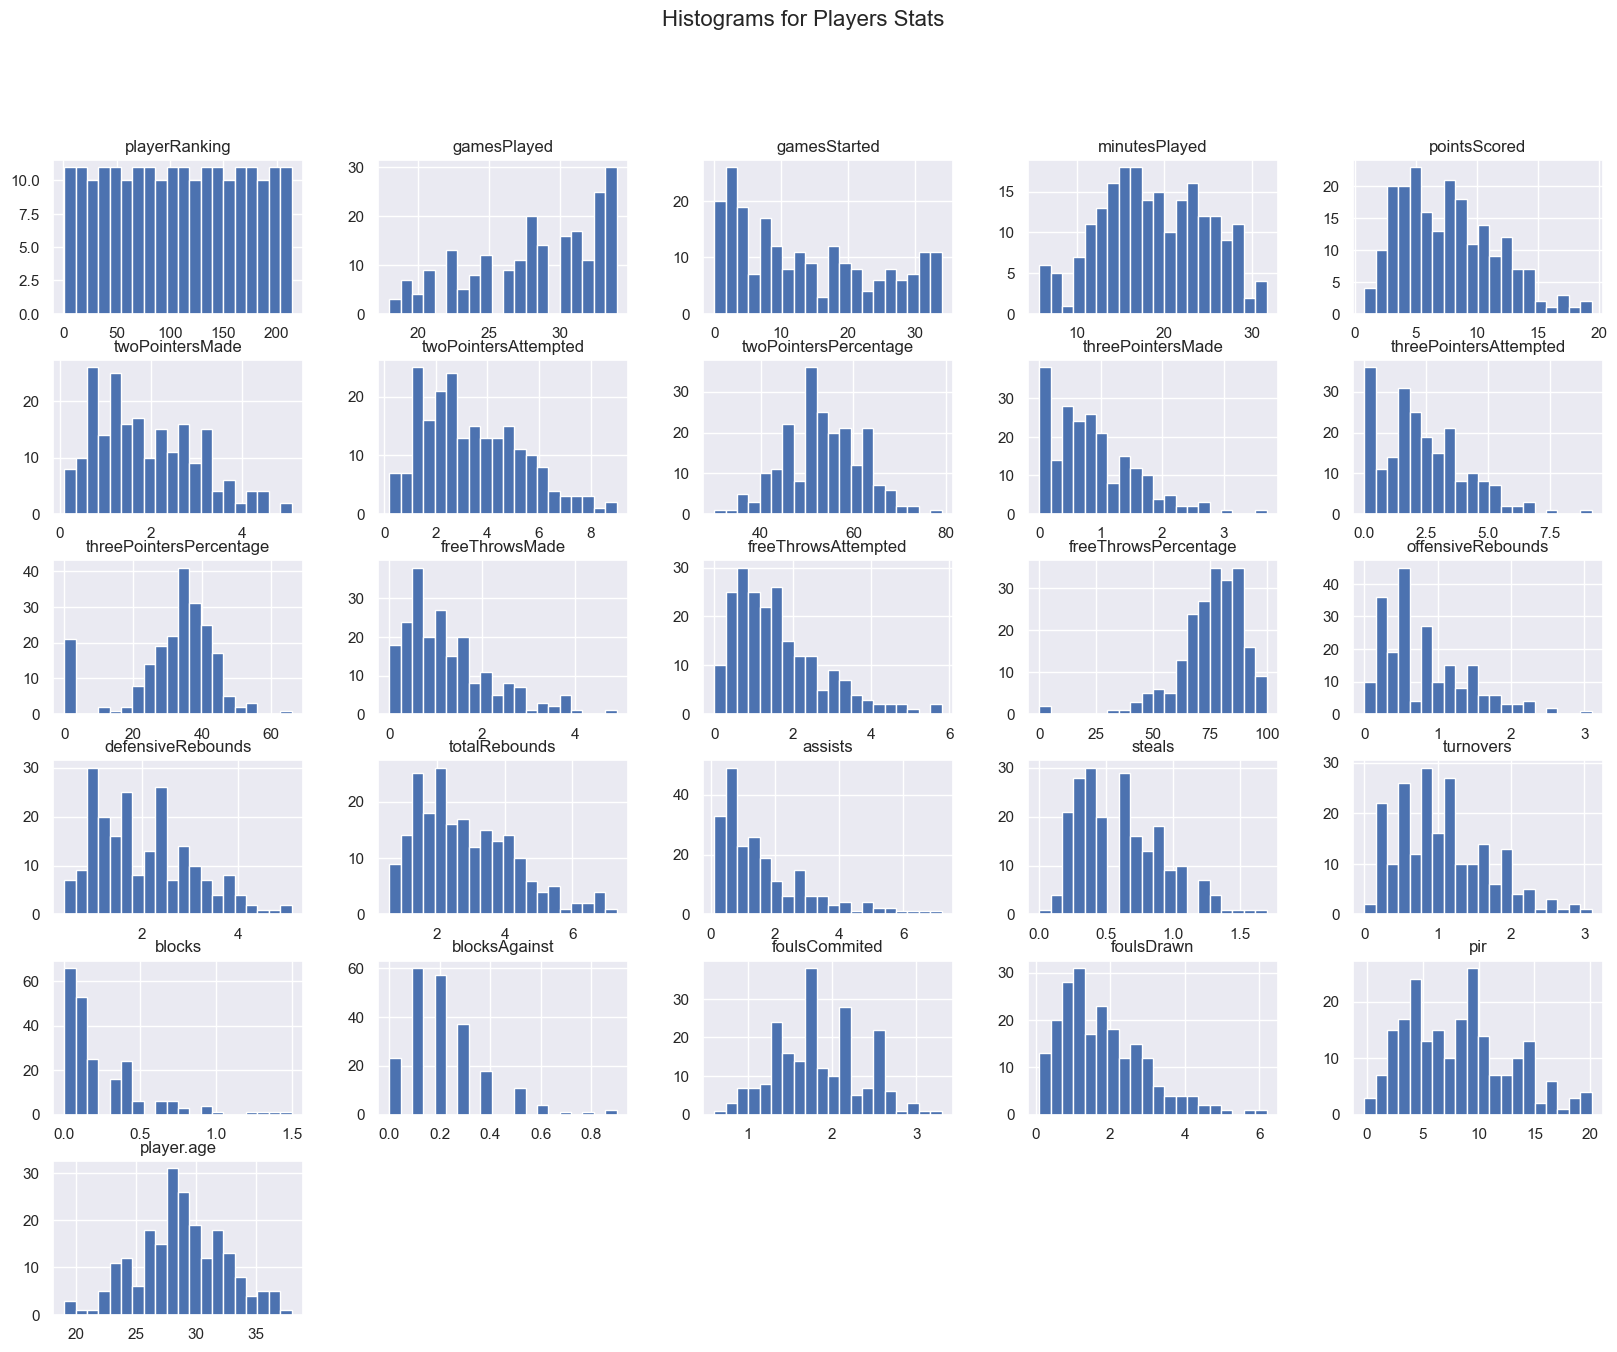

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Players Stats Distribution
players_df.hist(figsize=(20, 15), bins=20)
plt.suptitle('Histograms for Players Stats', fontsize=16)
plt.show()

**1. Games Played, Games Started, and Minutes Played**
Games Played: Shows a right-skewed distribution with a higher frequency around 28–34 games, indicating most players played nearly all games in the regular season.
Games Started: Has a left-skewed distribution, meaning most players started fewer games compared to games played, likely indicating rotation players or bench players.
Minutes Played: Approximately normal distribution, peaking between 15–25 minutes, highlighting most players had moderate playing time.
**2. Points Scored***
Right-skewed distribution, suggesting most players score fewer than 10 points per game, indicating scoring contributions are concentrated among a few high scorers.
**3. Shooting Stats (Two- and Three-Pointers)**
Two-Pointers Made/Attempted: Shows a slightly right-skewed distribution, with most players attempting 3–5 two-point shots and making around 2.
Three-Pointers Made/Attempted: Similar skewness, but the majority of players make 0–2 three-pointers, reflecting that three-point shooting is generally not a strong skill among the Euroleague players. 
Shooting Percentages: Distribution centers around 50–55% for two-pointers and 30–35% for three-pointers, reflecting that the league is more centered around better two point shooting than three point shooting like the NBA.
**4. Free Throws**
Free Throws Made/Attempted: Right-skewed, showing most players attempt and make fewer free throws, possibly indicating limited drives to the basket or fouls drawn.
Free Throw Percentage: Peaks around 70–80%, indicating most players are fairly accurate from the free-throw line.
**5. Rebounds (Offensive, Defensive, Total)**
Offensive Rebounds: Low values with a right-skewed pattern, reflecting that most players secure fewer than 2 offensive rebounds.
Defensive Rebounds: Broader spread, peaking at 2–4 rebounds, consistent with defensive rebounding being more common as more players are involved in it.
Total Rebounds: Peaks around 3–5, reflecting that most players average moderate rebounding numbers.
**6. Assists, Steals, and Turnovers**
Assists: Right-skewed with most players averaging 1–3 assists, indicating few playmakers in the league.
Steals: Similar pattern, peaking below 1.0, reflecting that steals are relatively rare events.
Turnovers: Spread across values, but peaks around 1–2, showing most players make 1–2 turnovers per game.
**7. Blocks and Blocks Against**
Both show very low values (right-skewed). Blocks are a specialized skill, and most players record 0–1 blocks per game.
**8. Fouls Committed and Drawn**
Fouls Committed: Slightly right-skewed, with most players committing 1–2 fouls per game.
Fouls Drawn: Right-skewed, indicating most players draw fewer fouls, with a few drawing more due to aggressive play.
**9. Performance Index Rating (PIR)**
Shows a broad spread peaking around 7–10, with few players having extremely high ratings (15–20), highlighting star performers.
**10. Player Age**
Approximates a normal distribution peaking at 28–30 years, reflecting a mix of already experienced playersand not so many young players.

Thus, key insights are that:
-the dataset highlights the presence of role players (lower stats) and star players (higher stats).
-shooting efficiency metrics (percentages) are clustered around league averages.
-rebounding and playmaking stats indicate positional specialization.

Also most players fall within average performance metrics, with a few outliers excelling in specific areas.

C:\Users\godut\AppData\Local\Temp\ipykernel_3716\3945951563.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(players_df['pointsScored'], label='Points Scored', shade=True)
C:\Users\godut\AppData\Local\Temp\ipykernel_3716\3945951563.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(players_df['assists'], label='Assists', shade=True)
C:\Users\godut\AppData\Local\Temp\ipykernel_3716\3945951563.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(players_df['totalRebounds'], label='Rebounds', shade=True)


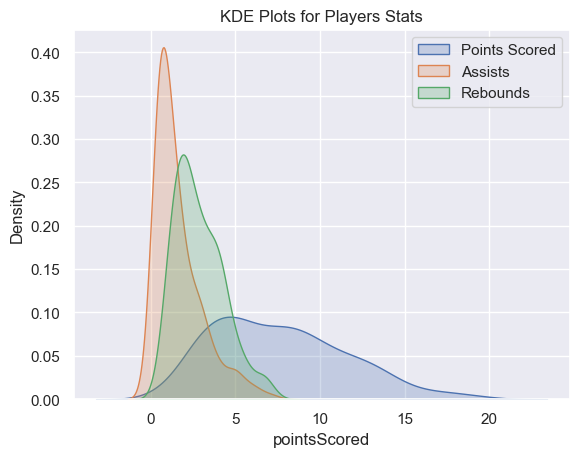

In [190]:
# KDE for key variables in players_df
sns.kdeplot(players_df['pointsScored'], label='Points Scored', shade=True)
sns.kdeplot(players_df['assists'], label='Assists', shade=True)
sns.kdeplot(players_df['totalRebounds'], label='Rebounds', shade=True)
plt.title('KDE Plots for Players Stats')
plt.legend()
plt.show()

**Points Scored** distribution is right-skewed with most players scoring fewer than 10 points. A small subset of players scores significantly higher, indicating some standout performers (scoring stars of the league).
**Assists** have a highly right-skewed distribution showing most players contribute very few assists (0–3 range). Thus, few players act as primary playmakers, contributing a larger share of assists.
**Rebounds** are similar to assists, with a distribution that skews to the right, with most players contributing fewer than 5 rebounds. Some players dominate the rebounds, which indicates the presence of specific roles in the game such as centers.

Key insight is that the KDE plot confirms that basketball performance metrics tend to be positively skewed, reflecting role specialization, where only a few players dominate scoring, assists, or rebounds.

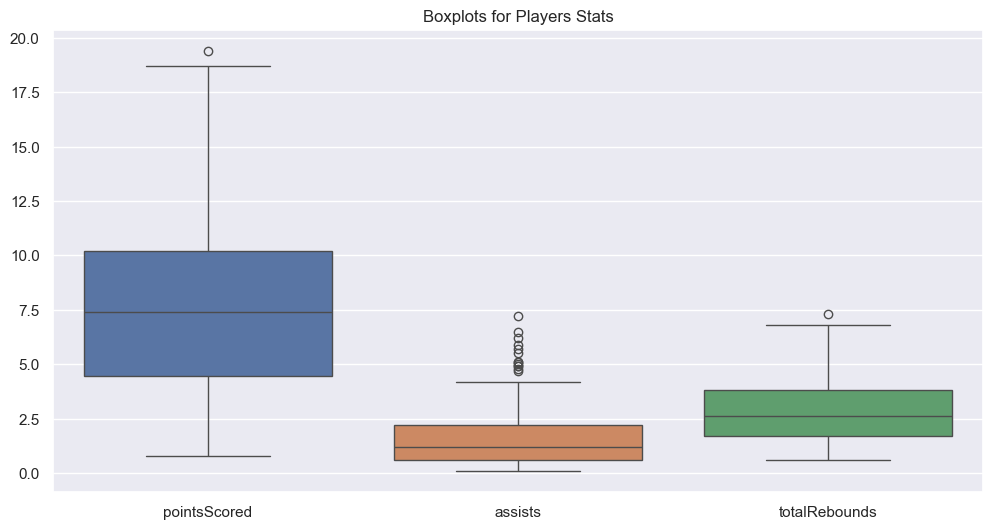

In [192]:
# Boxplot for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=players_df[['pointsScored', 'assists', 'totalRebounds']])
plt.title('Boxplots for Players Stats')
plt.show()

Median of **Points Scored** is around 7–8, with outliers above 15 points highlighting elite scorers who may carry the offensive burden for their teams.
Median of **Assists** is low, approximately 1 assist per player with multiple outliers above 4–5 assists representing primary playmakers, while others contribute minimally.
Median of **Total Rebounds** is around 2–3 rebounds with outliers above 7–8 rebounds highlighting key rebounders, most likely centers or forwards.

Key insight is that the presence of several outliers suggests the need to examine specific player roles and performances. These outliers could also influence modeling outcomes, making normalization or transformation techniques important for further analysis.

### Correlation Analysis 

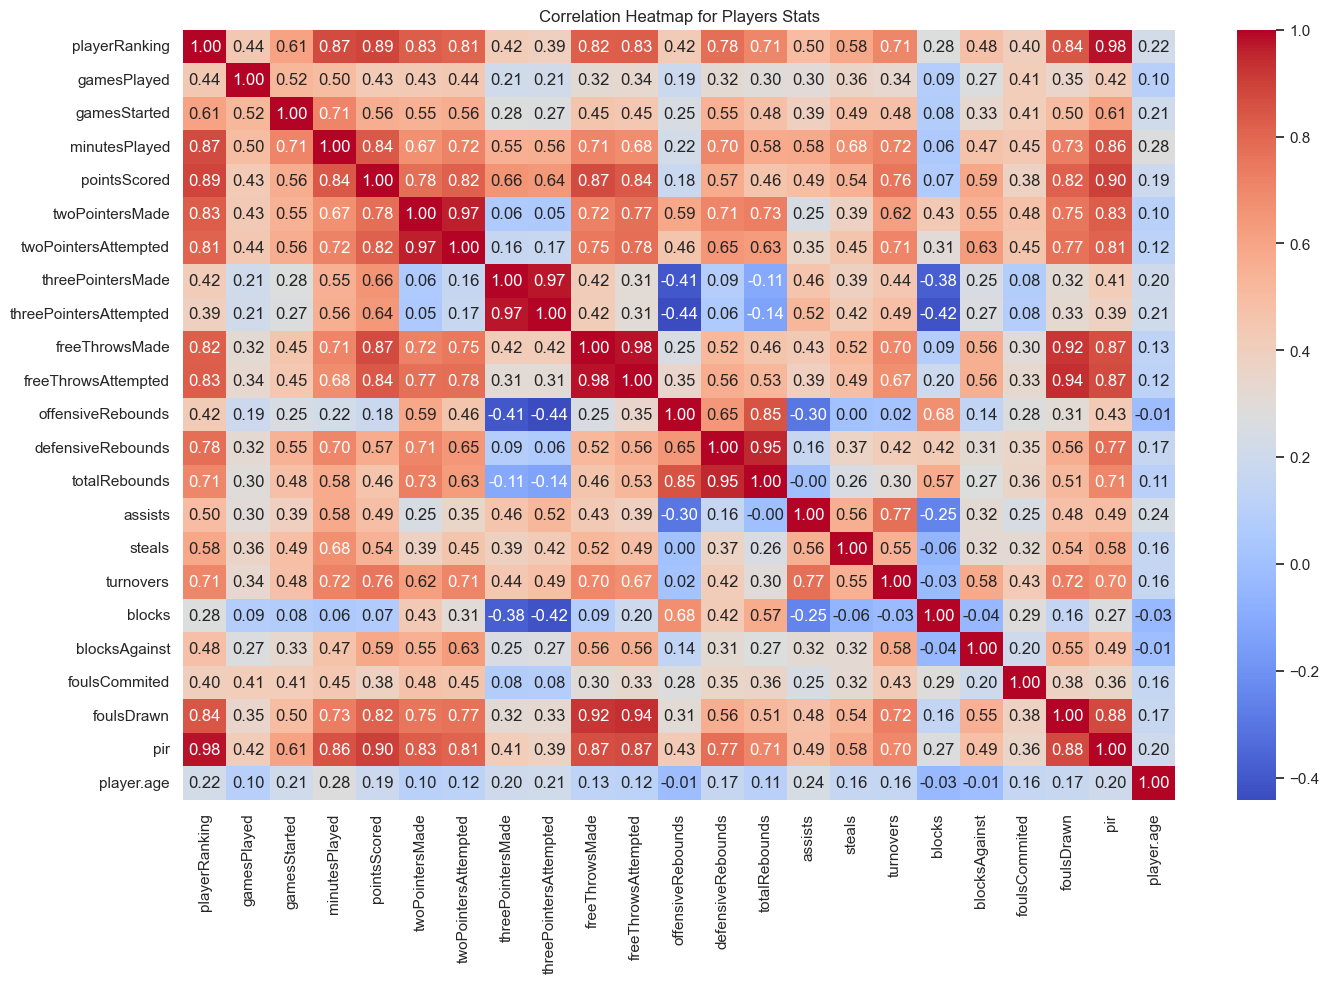

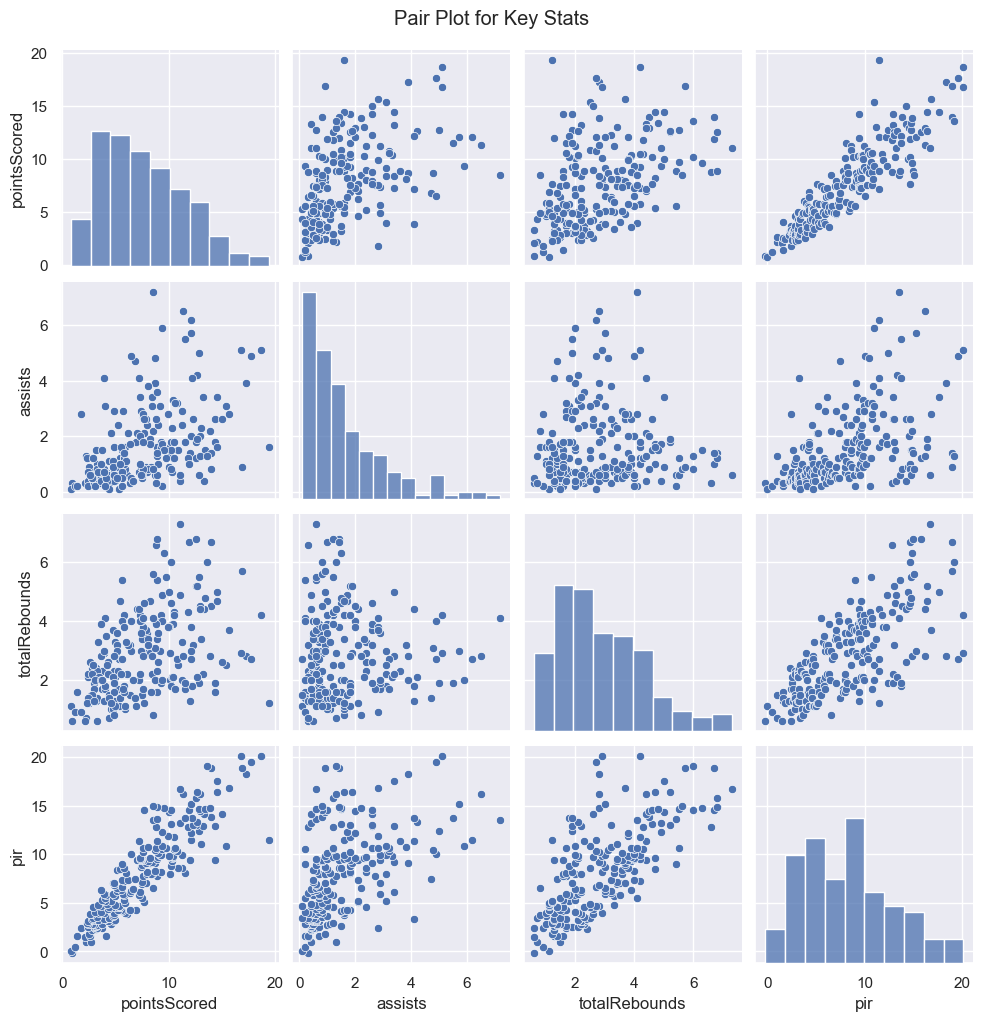

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are selected for correlation matrix
numeric_players_df = players_df.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix for Players
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_players_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Players Stats')
plt.show()

# Pair Plots for key metrics
sns.pairplot(numeric_players_df[['pointsScored', 'assists', 'totalRebounds', 'pir']])
plt.suptitle('Pair Plot for Key Stats', y=1.02)
plt.show()

**Strong Positive Correlations** between pir (Performance Index Rating) and the following stats:
-pointsScored (0.84) and assists (0.77), emphasizing scoring and assists significantly impact performance ratings.
-totalRebounds (0.85), showing rebounding ability also contributes to performance.

Also **points scored correlates strongly** with:
-minutes played (0.68), more playing time generally results in higher scores.
-two pointers made (0.84) and threePointersMade (0.66), highlighting shooting success directly affects total points.
Rebounds and Defense:

Similarly, **total rebounds highly correlates** with:
-offensive rebounds (0.95) and defensive rebounds (0.94), suggesting balanced contributions from both ends of the court.
-blocks (0.57) also show moderate correlation with total rebounds, indicating defensive players often excel in both areas.

**Among Fouls and Turnovers**, fouls committed (0.72) and turnovers (0.62) are moderately correlated with pir, showing negative actions still contribute to overall performance due to high involvement in the game.

**Low Correlations** can be seen between player age and most of other stats (maximum ~0.22), suggesting performance is less dependent on age in this dataset.

Key insight is that Performance Index Rating (pir) is a comprehensive measure combining scoring, assists, rebounds, and minutes played. Offensive and defensive contributions (points, rebounds, assists) play major roles in determining player rankings. Errors like fouls and turnovers, while impactful, do not overshadow positive performance metrics.

### Performance Trends

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

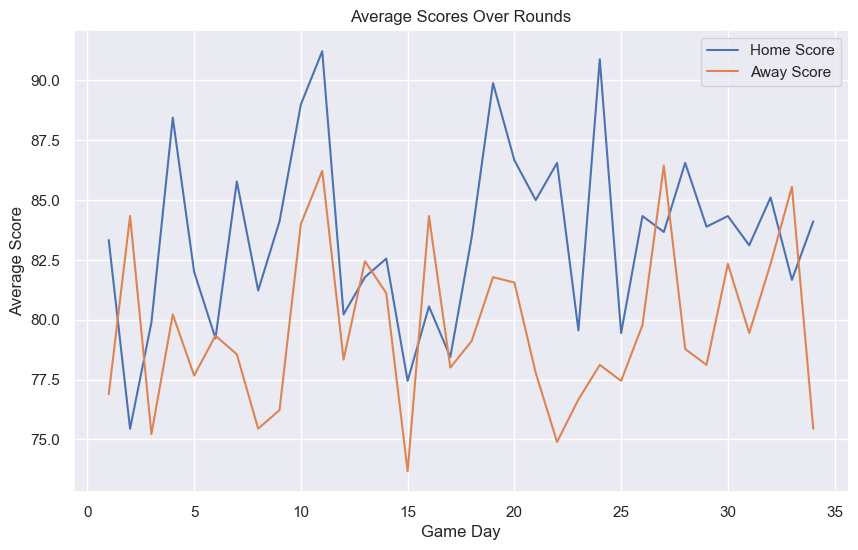

In [202]:
# Points Scored over Rounds
trend_df = rs_games_df.groupby('gameday')[['homescore', 'awayscore']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='gameday', y='homescore', label='Home Score')
sns.lineplot(data=trend_df, x='gameday', y='awayscore', label='Away Score')
plt.title('Average Scores Over Rounds')
plt.xlabel('Game Day')
plt.ylabel('Average Score')
plt.legend()
plt.show()

**Home Scores**
Home teams generally scored higher than away teams, as indicated by the upper trend line. Scores fluctuate between approximately 75 to 91 points, with several peaks and drops, showing variability in performance across rounds. Peaks around rounds 10, 20, and 25 highlight significant scoring bursts, possibly due to favorable matchups, form, or tactical adjustments.

**Away Scores**
Away teams scored lower on average compared to home teams, generally ranging from 73 to 85 points. The fluctuations are more pronounced, indicating performance inconsistencies when playing away games. Noticeable dips, such as around rounds 15 and 25, may reflect the challenges of playing away, such as travel fatigue or crowd influence.

**Trend Comparison**
Home teams consistently outperform away teams in most rounds, **reinforcing the home-court advantage hypothesis**. Both trends show high variability, suggesting that match dynamics, team strategies, and player performances significantly influence scores.

Key insight is that home teams tend to have a scoring edge, but the variability for both groups suggests examining external factors like matchups, fatigue, and travel schedules. This pattern could help inform predictions by including home/away performance metrics in the model.

### Team and Player comparisons

C:\Users\godut\AppData\Local\Temp\ipykernel_3716\3831380492.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scorers, x='pointsScored', y='player.name', palette='viridis')


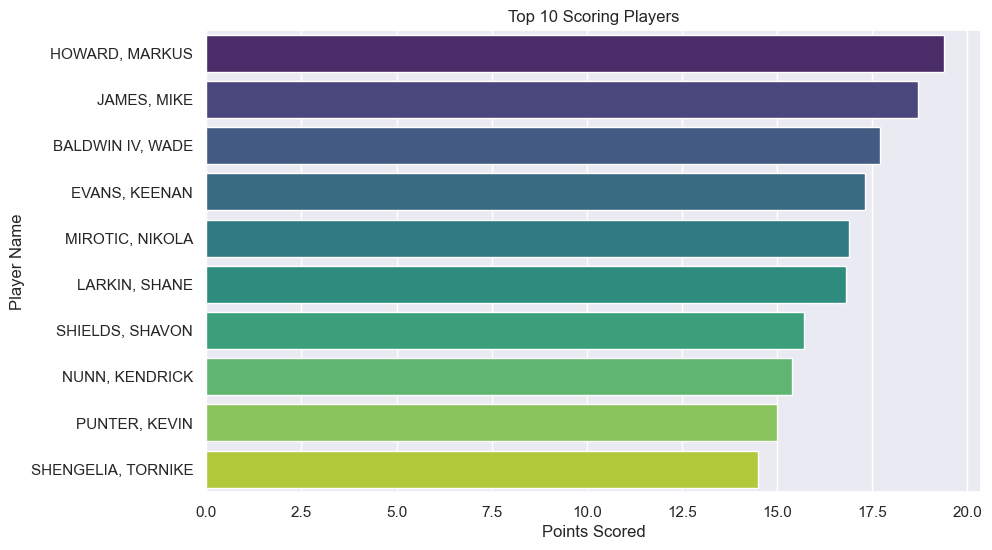

C:\Users\godut\AppData\Local\Temp\ipykernel_3716\3831380492.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_performance, x='pointsScored', y='team.name', palette='plasma')


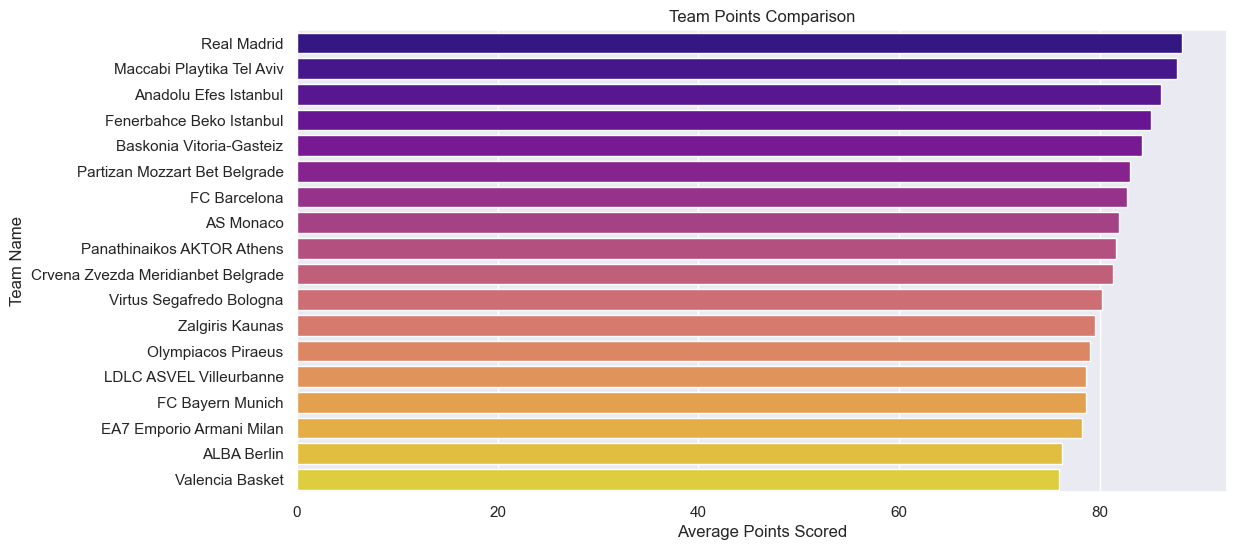

In [205]:
# Top 10 Scoring Players
top_scorers = players_df[['player.name', 'pointsScored']].sort_values(by='pointsScored', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_scorers, x='pointsScored', y='player.name', palette='viridis')
plt.title('Top 10 Scoring Players')
plt.xlabel('Points Scored')
plt.ylabel('Player Name')
plt.show()

# Team Performance Comparison
team_performance = teams_df[['team.name', 'pointsScored']].sort_values(by='pointsScored', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=team_performance, x='pointsScored', y='team.name', palette='plasma')
plt.title('Team Points Comparison')
plt.xlabel('Average Points Scored')
plt.ylabel('Team Name')
plt.show()

**Top 10 Scoring Players**
Markus Howard leads the scoring charts with just under 20 points per game, making him the standout offensive player in the dataset. Then, Mike James and Wade Baldwin IV follow closely with average points scored above 17, showing consistent offensive performance. The distribution of points among the top 10 players indicates a high scoring capacity among key performers, with scores ranging from 14 to 20 points. These players are mainly playing in the point guard position, significantly influencing the flow of the match and its outcome.

**Team Performance Comparison**
Real Madrid leads the team performance rankings with the highest average points scored among all teams, showcasing their dominance in offense. Then, Maccabi Playtika Tel Aviv, Anadolu Efes Istanbul, and Fenerbahce Beko Istanbul also stand out as high-scoring teams, indicating strong offensive capacity. The gradual decline in average scores across teams suggests a competitive balance, with most teams averaging between 75 and 85 points per game. Then, teams towards the lower end, such as Valencia Basket and ALBA Berlin, may need to improve offensive efficiency to compete with the top-performing teams.

In [225]:
# Merge the Top 10 Scorers with Team Performance Data
top_10_players = players_df.nlargest(10, 'pointsScored')
top_10_teams = teams_df.nlargest(10, 'pointsScored')

# Merge datasets based on team codes to match players with their teams
merged_top = pd.merge(
    top_10_players[['player.name', 'pointsScored', 'player.team.code']],
    top_10_teams[['team.code', 'team.name', 'pointsScored']],
    left_on='player.team.code',
    right_on='team.code',
    how='inner'
)

# Display merged result
print(merged_top)

          player.name  pointsScored_x player.team.code team.code  \
0      HOWARD, MARKUS            19.4              BAS       BAS   
1         JAMES, MIKE            18.7              MCO       MCO   
2    BALDWIN IV, WADE            17.7              TEL       TEL   
3       LARKIN, SHANE            16.8              IST       IST   
4      NUNN, KENDRICK            15.4              PAN       PAN   
5       PUNTER, KEVIN            15.0              PAR       PAR   
6  HAYES-DAVIS, NIGEL            14.5              ULK       ULK   

                       team.name  pointsScored_y  
0       Baskonia Vitoria-Gasteiz            84.2  
1                      AS Monaco            81.9  
2      Maccabi Playtika Tel Aviv            87.7  
3          Anadolu Efes Istanbul            86.1  
4     Panathinaikos AKTOR Athens            81.6  
5  Partizan Mozzart Bet Belgrade            83.0  
6       Fenerbahce Beko Istanbul            85.1  


As observed 7 out of the Top 10 scoring players belong to Top 10 scoring teams, indicating that top-scoring teams tend to have at least one high-performing player contributing significantly to their offensive performance, aligning with expectations for competitive success.

This way:
Markus Howard (19.4 PPG) plays for Baskonia Vitoria-Gasteiz, which averages 84.2 points per game.
Wade Baldwin IV (17.7 PPG) represents Maccabi Playtika Tel Aviv, scoring 87.7 points per game.
Shane Larkin (16.8 PPG) is with Anadolu Efes Istanbul, scoring 86.1 points per game.


### Shot analysis

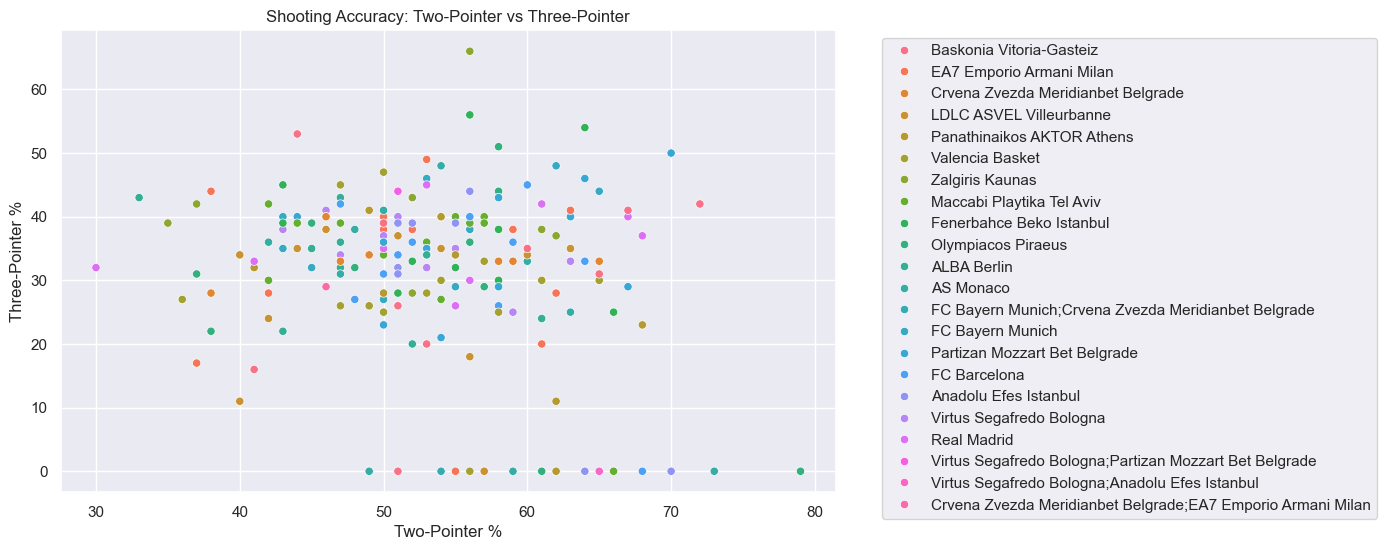

In [207]:
# Shot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(data=players_df, x='twoPointersPercentage', y='threePointersPercentage', hue='player.team.name')
plt.title('Shooting Accuracy: Two-Pointer vs Three-Pointer')
plt.xlabel('Two-Pointer %')
plt.ylabel('Three-Pointer %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Two-Point vs Three-Point Accuracy**
The scatter plot reveals the relationship between two-pointer and three-pointer shooting percentages for different teams. Most teams tend to have higher two-point accuracy (40–60%) compared to three-point accuracy (20–50%), staying in line with the distributions we observed previously. 

As seen, teams with better two-point shooting also show moderately decent three-point shooting. Some outliers indicate teams with very high two-point percentages (near 70–80%) but lower three-point percentages. The clustering suggests teams might adopt different strategies, focusing more on either inside or outside shooting.

#### Clustering analysis

C:\Users\godut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


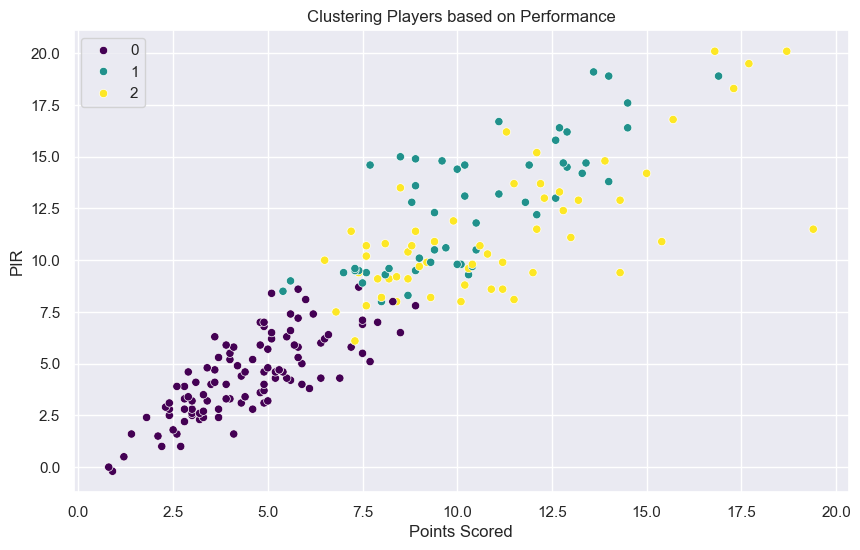

In [213]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numeric columns for clustering
cluster_data = players_df[['pointsScored', 'assists', 'totalRebounds', 'pir']]

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
players_df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=players_df, x='pointsScored', y='pir', hue='cluster', palette='viridis')
plt.title('Clustering Players based on Performance')
plt.xlabel('Points Scored')
plt.ylabel('PIR')
plt.legend()
plt.show()

**Clusters Overview:**
players are grouped into 3 performance clusters based on Points Scored and Performance Index Rating (PIR):
-Cluster 0 (Purple): Low scorers and lower PIR values—likely role players or bench players.
-Cluster 1 (Green): Mid-level scorers with moderate PIR—players with consistent contributions.
-Cluster 2 (Yellow): High scorers with high PIR—star players or offensive leaders.

**Observations:**
a strong positive correlation exists between points scored and PIR, indicating that scoring heavily influences overall performance metrics. Outliers with high PIR but moderate scoring may highlight defensive specialists or versatile contributors. Cluster separation provides insights into player roles, supporting targeted strategies for improvement or rotations. This analysis helps in identifying scoring strategies and performance gaps, potentially informing lineup adjustments and training focus areas.

### Hypothesis Testing

In [216]:
from scipy.stats import ttest_ind

# T-test between home and away scores
t_stat, p_val = ttest_ind(rs_games_df['homescore'], rs_games_df['awayscore'])

print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: 4.4929755996827625, P-Value: 8.403617221860064e-06


**Hypothesis Testing: Home vs Away Scores**
Objective: to test whether there is a significant difference between home and away scores.
Null Hypothesis (H₀): Home and away scores have the same mean (no difference).
Alternative Hypothesis (H₁): Home and away scores have different means (there is a difference).

**Results*:
T-Statistic = 4.49:
The t-statistic measures the difference between group means relative to the variability. A high t-value indicates a larger difference between means.

P-Value = 8.40e-06:
The p-value is extremely small (<< 0.05), indicating strong evidence to reject the null hypothesis.

**Conclusion**:
The test suggests a statistically significant difference between home and away scores. This way, home teams tend to score higher than away teams, supporting the hypothesis that home-court advantage impacts scoring performance. This result can inform strategies, such as emphasizing home-game preparation or mitigating travel effects for away games.

## Findings 

The exploratory data analysis (EDA) of the Euroleague regular season 2023-2024 dataset revealed several important insights into player performance, team dynamics, and game outcomes. 

Players' performance index ratings (PIR) turned out to be strongly influenced by points scored, assists, rebounds, and playing time, highlighting the significance of well-rounded contributions. 

Top-scoring teams, such as Real Madrid and Maccabi Tel Aviv, often featured players from the top 10 individual scorers, emphasizing the impact of star players on team success. 

Shooting accuracy analysis showed a stronger reliance on two-pointers across teams instead of three-pointers, with clusters of players exhibiting distinct performance patterns. 

Home teams consistently outperformed away teams, as confirmed by hypothesis testing, indicating a statistically significant home-court advantage. Additionally, correlation analysis emphasized the interplay between scoring efficiency, rebounds, and assists, validating their roles as critical performance drivers. These findings provide a solid foundation for modeling approaches aimed at predicting game outcomes and optimizing team strategies.